In [21]:
#!pip install --force-reinstall -v "tensorflow==2.15.1"

In [1]:
import easyocr
import keras_ocr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
from tqdm.notebook import tqdm

plt.style.use('ggplot')

In [2]:
test_imgs = glob('/content/images')

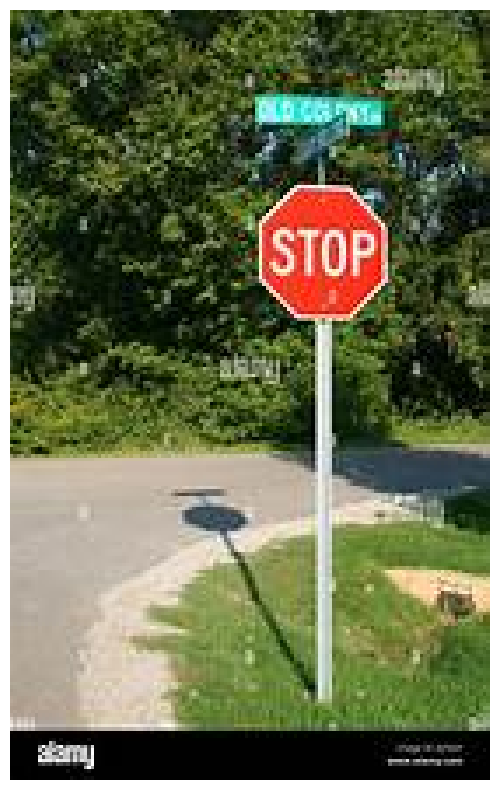

In [3]:

test_imgs = glob('/content/images/*')

fig, ax = plt.subplots(figsize=(10, 10))

if test_imgs:
    ax.imshow(plt.imread(test_imgs[0]))
    ax.axis('off')
    plt.show()
else:
    print("No images found in the directory.")


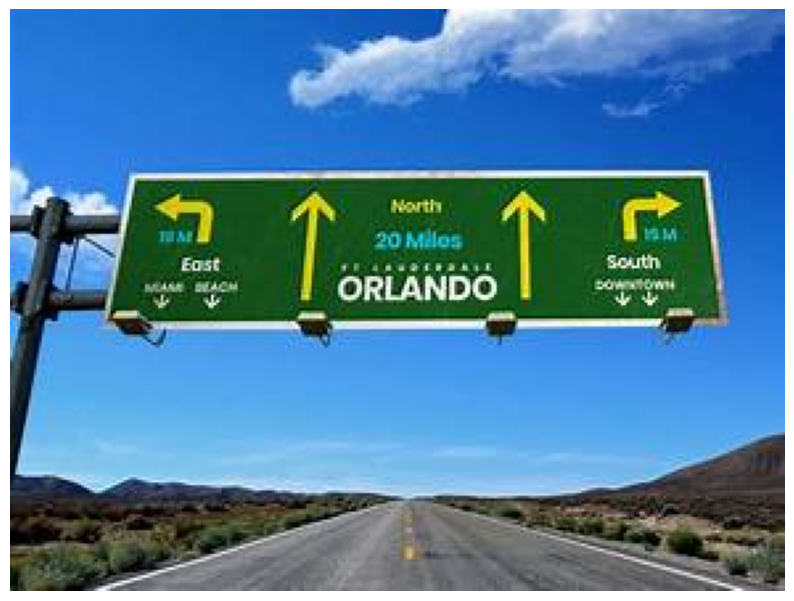

In [4]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(plt.imread(test_imgs[1]))
ax.axis('off')
plt.show()

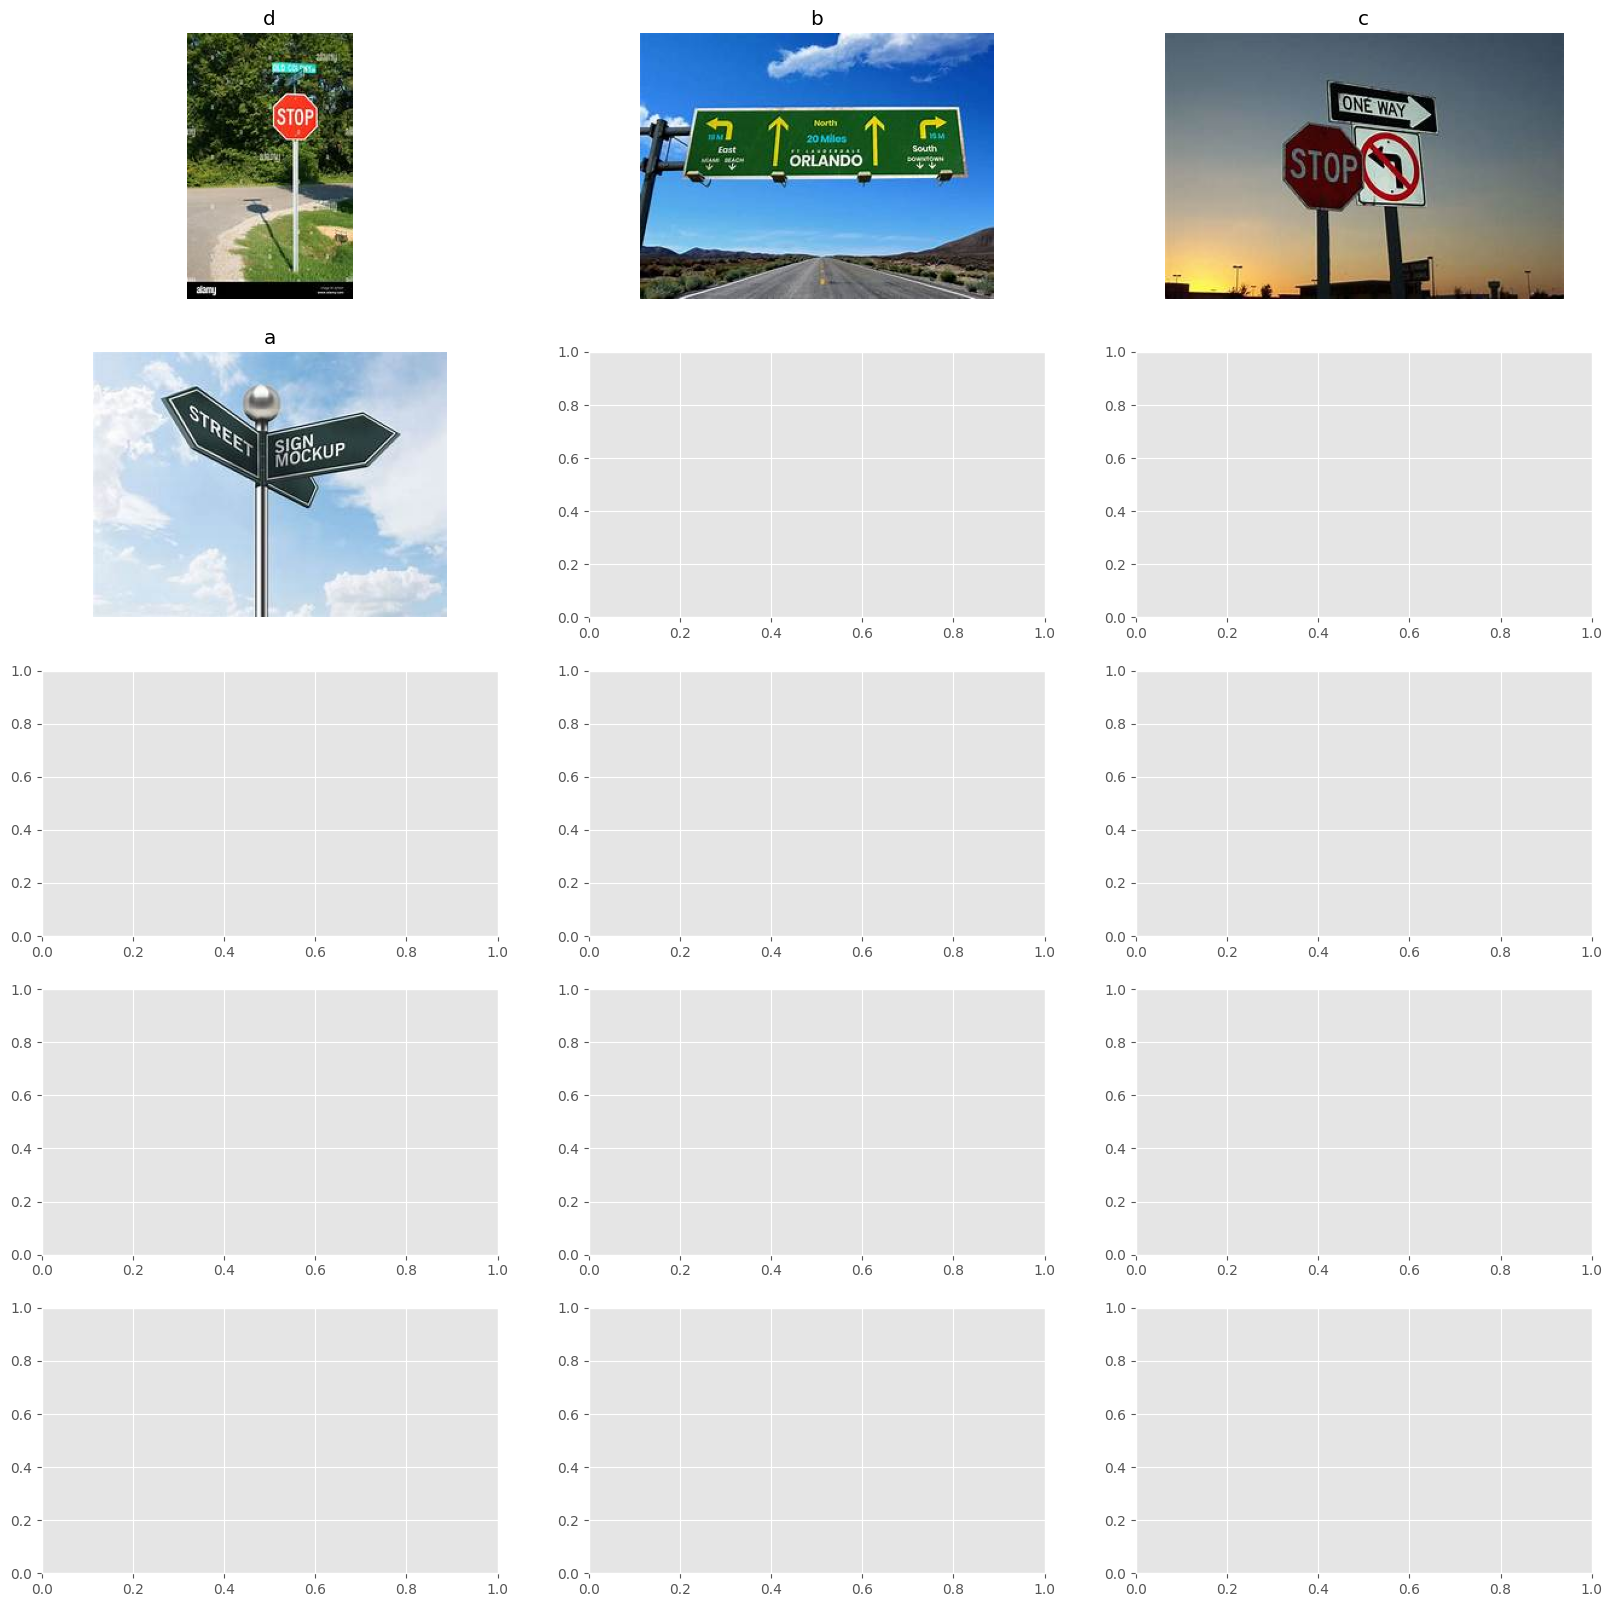

In [5]:
fig, axs = plt.subplots(5, 3, figsize=(20, 20))
axs = axs.flatten()
for i in range(4):
    axs[i].imshow(plt.imread(test_imgs[i]))
    axs[i].axis('off')
    img_id = test_imgs[i].split('/')[-1].split('.')[0]
    axs[i].set_title(f'{img_id}')
plt.show()

In [11]:
reader = easyocr.Reader(['en', 'no'], gpu = True)
img = test_imgs[2]
res = reader.readtext(img)
pd.DataFrame(res, columns=['bbox', 'text', 'conf'])

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

,bbox,text,conf
0,"[[142, 48], [204, 48], [204, 72], [142, 72]]",ONEVAY,0.370135
1,"[[97, 91], [165, 91], [165, 129], [97, 129]]",[STOP,0.503889


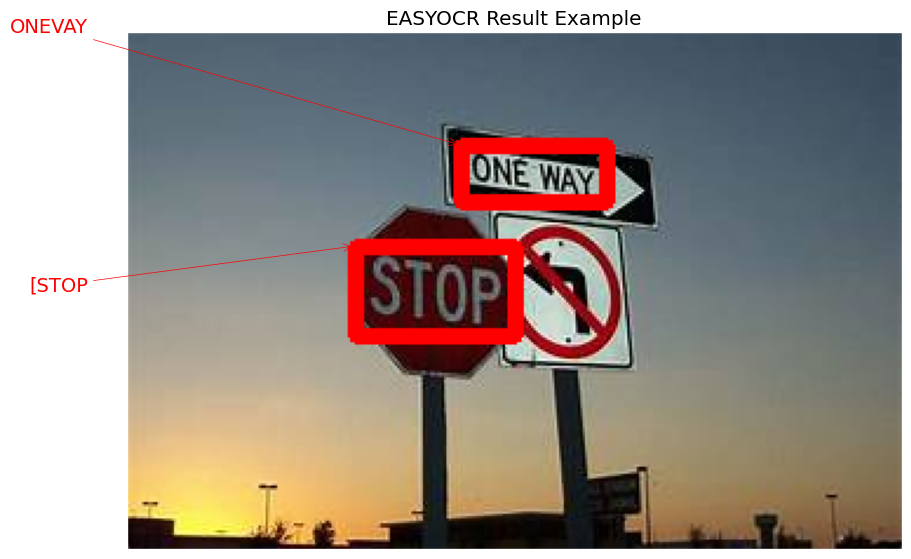

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import keras_ocr
fig, ax = plt.subplots(figsize = (10, 10))
res_df = pd.DataFrame(res, columns=['bbox', 'text', 'conf'])
res = res_df[['text','bbox']].values.tolist()
res = [(x[0], np.array(x[1])) for x in res]
keras_ocr.tools.drawAnnotations(plt.imread(img), res, ax=ax)
ax.set_title('EASYOCR Result Example')
plt.show()

In [13]:
pipeline = keras_ocr.pipeline.Pipeline()
res = pipeline.recognize([test_imgs[0]])
pd.DataFrame(res[0], columns = ['text', 'bbox'])

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


,text,bbox
0,stop,"[[73.0, 60.0], [107.0, 60.0], [107.0, 77.0], [..."


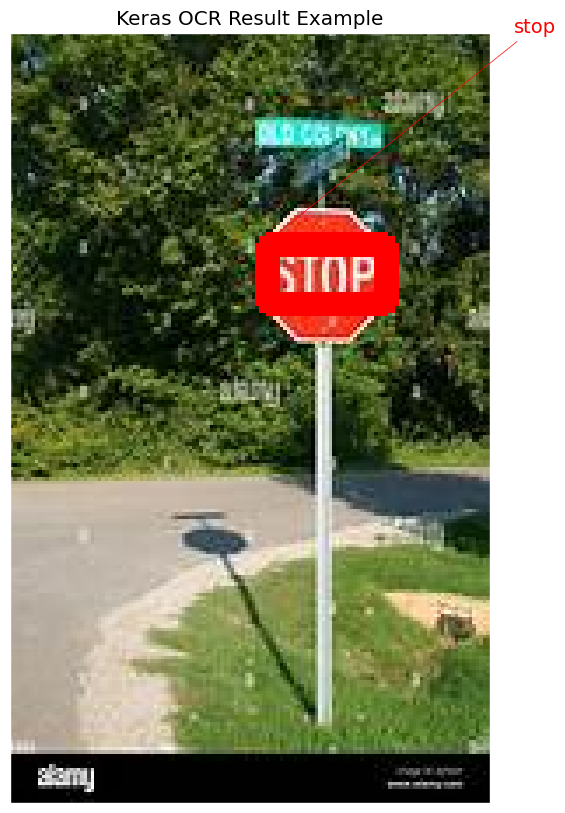

In [14]:
fig, ax = plt.subplots(figsize = (10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(test_imgs[0]), res[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

In [17]:
reader = easyocr.Reader(['en', 'no'], gpu = True)
img = test_imgs[3]
res = reader.readtext(img)
pd.DataFrame(res, columns=['bbox', 'text', 'conf'])

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

,bbox,text,conf
0,"[[145, 65], [215, 65], [215, 101], [145, 101]]",sł8CKup,0.120911
1,"[[81.47262808454903, 34.046717273474556], [142...",STREET,0.979368


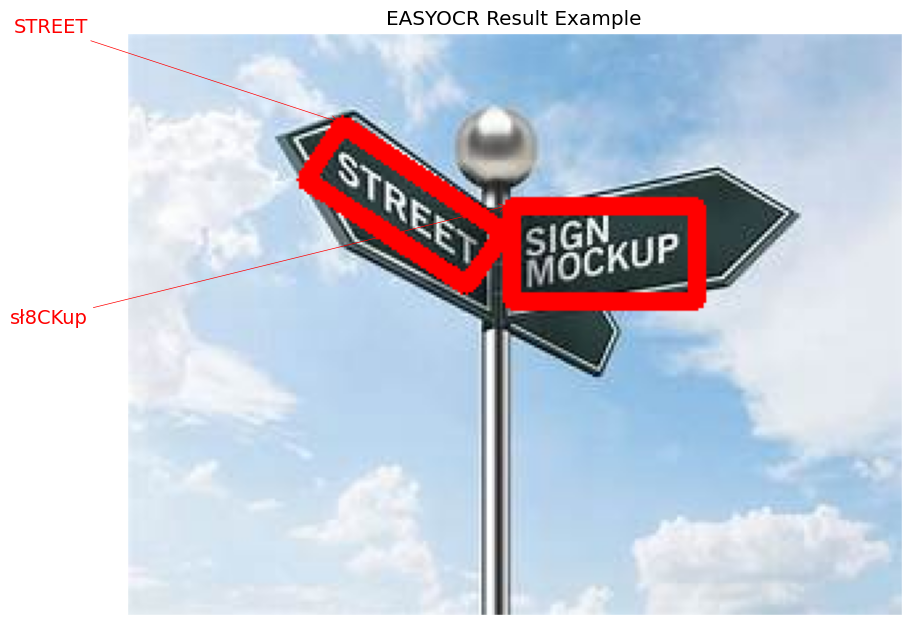

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import keras_ocr
fig, ax = plt.subplots(figsize = (10, 10))
res_df = pd.DataFrame(res, columns=['bbox', 'text', 'conf'])
res = res_df[['text','bbox']].values.tolist()
res = [(x[0], np.array(x[1])) for x in res]
keras_ocr.tools.drawAnnotations(plt.imread(img), res, ax=ax)
ax.set_title('EASYOCR Result Example')
plt.show()